<a href="https://colab.research.google.com/github/divyanshdahikar/House_price_prediction_DL_NN/blob/main/House_Price_Prediction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21597, 21)

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Figure size 1000x600 with 0 Axes>

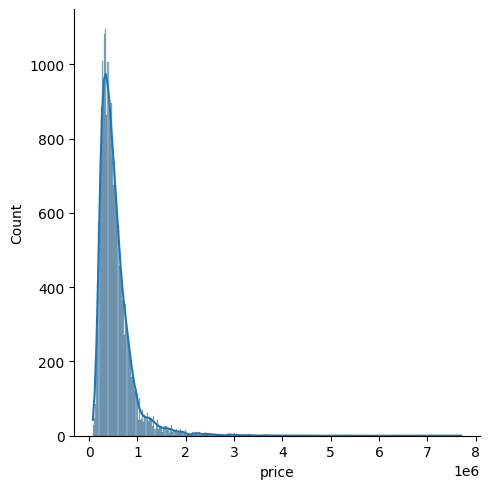

In [ ]:
plt.figure(figsize = (10,6))
sns.displot(x = df['price'], kde = True)

<Axes: xlabel='bedrooms', ylabel='count'>

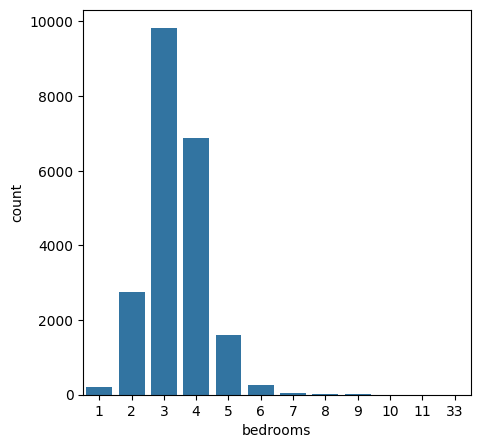

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'bedrooms', data = df)

In [ ]:
df.corr(numeric_only = True)['price'].sort_values()

,price
zipcode,-0.053402
id,-0.016772
long,0.022036
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.126424
floors,0.256804
waterfront,0.266398


<Axes: xlabel='price', ylabel='sqft_living'>

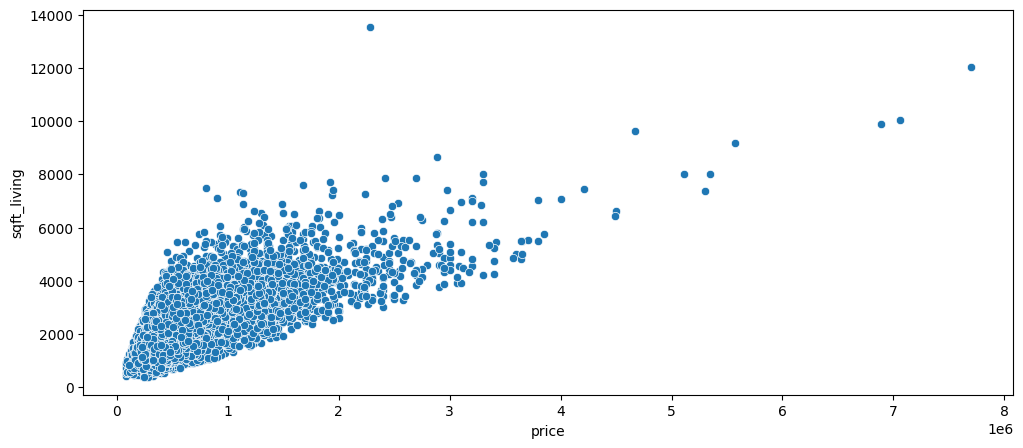

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(y = 'sqft_living', x = 'price', data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

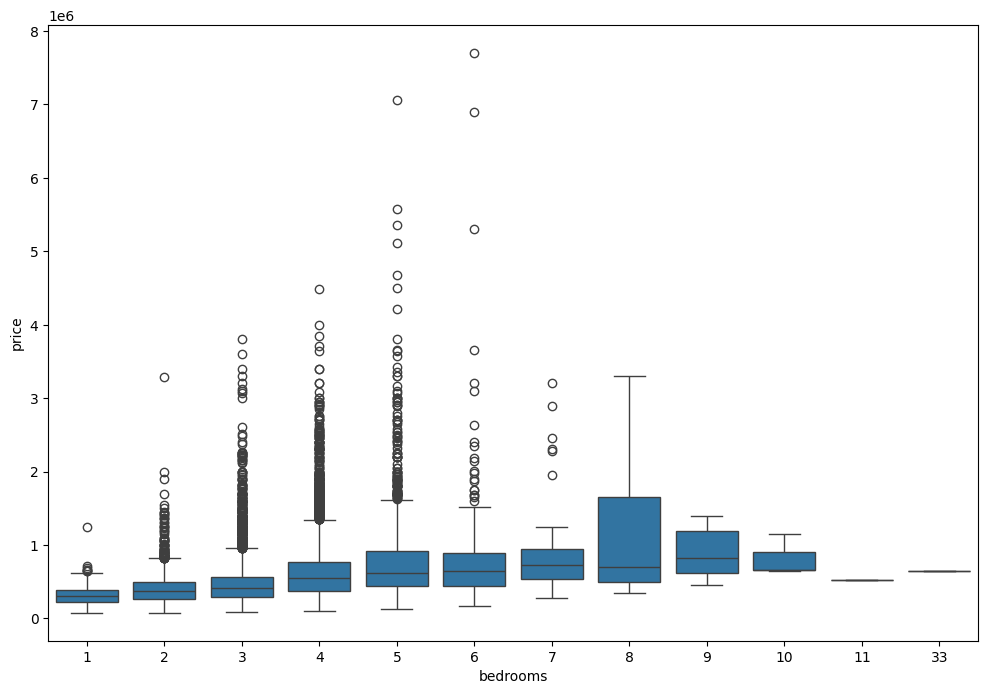

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'bedrooms', y = 'price')

<Axes: xlabel='price', ylabel='long'>

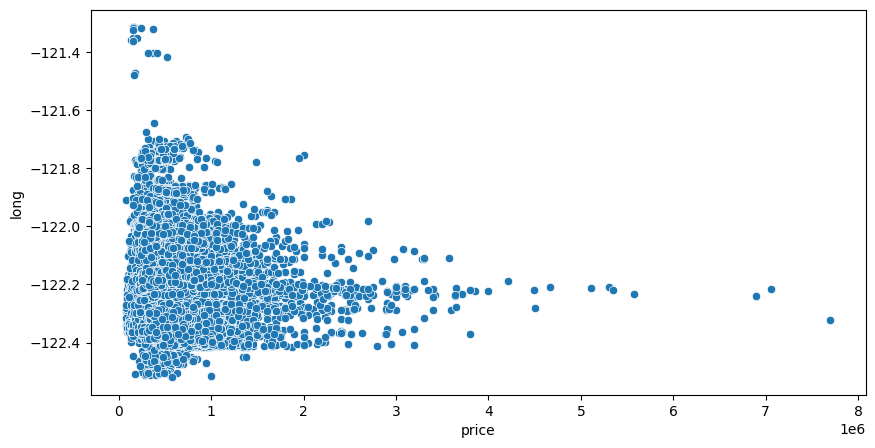

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'long', x = 'price', data = df)

<Axes: xlabel='price', ylabel='lat'>

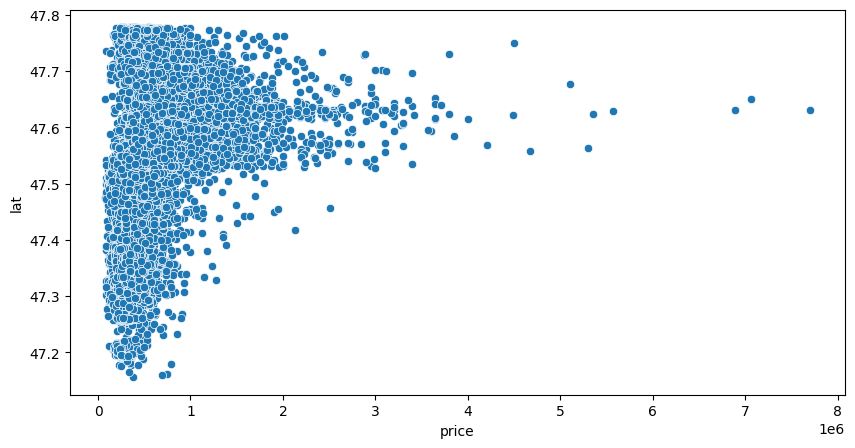

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'lat', x = 'price', data = df)

<Axes: xlabel='long', ylabel='lat'>

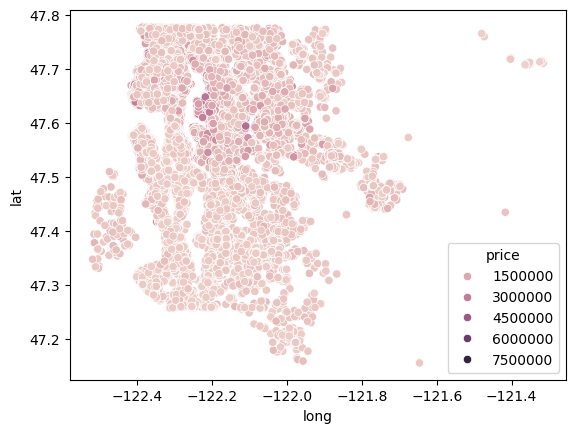

In [ ]:
sns.scatterplot(y = 'lat',x = 'long', hue = 'price',data = df)

In [ ]:
len(df)*0.01

215.97

In [ ]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
non_top_1_per = df.sort_values('price', ascending = False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

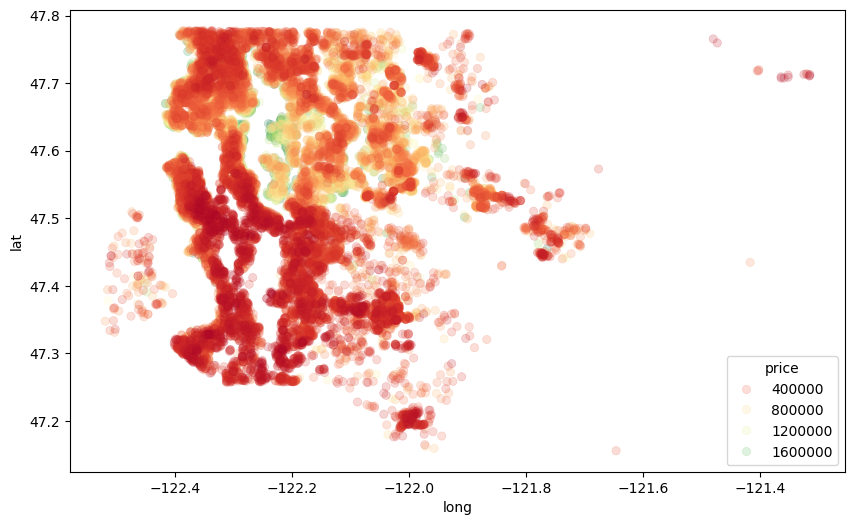

In [ ]:
plt.figure(figsize =  (10,6))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', data = non_top_1_per, palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

<Axes: xlabel='waterfront', ylabel='price'>

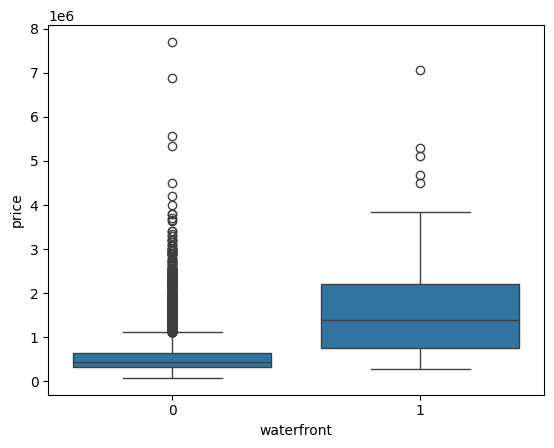

In [ ]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [ ]:
df = df.drop('id', axis = 1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# df['date']

In [ ]:
df['year'] = df['date'].apply(lambda date : date.year)

In [ ]:
df['month'] = df['date'].apply(lambda date : date.month)

In [ ]:
# df

<Axes: xlabel='month', ylabel='price'>

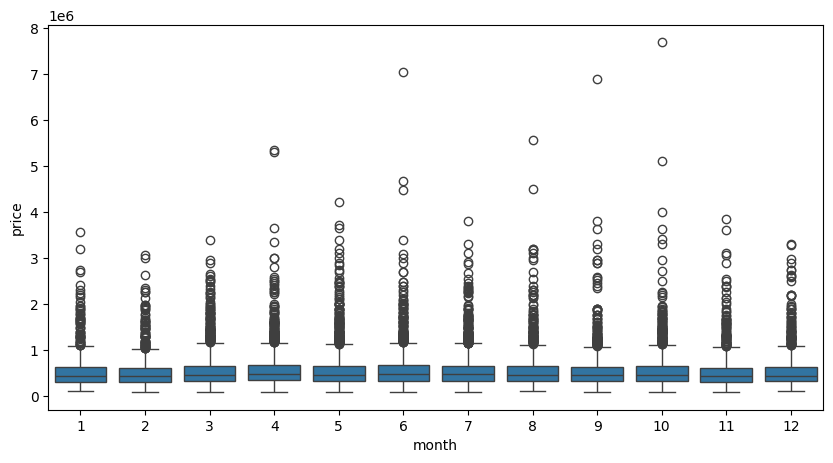

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'month', y = 'price', data = df)

<Axes: xlabel='month'>

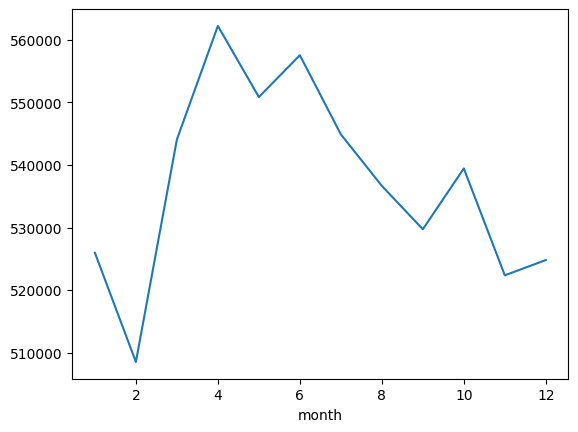

In [ ]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

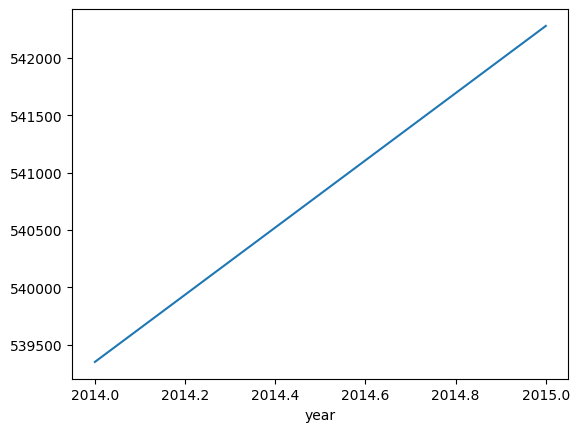

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis = 1)

In [ ]:
# df

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
# df['zipcode'].value_counts()

In [ ]:
df = df.drop('zipcode', axis = 1)

In [ ]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,20683
2014,91
2013,37
2003,36
2005,35
...,...
1948,1
1951,1
1959,1


In [ ]:
df['sqft_basement'].value_counts()

,count
sqft_basement,
0,13110
600,221
700,218
500,214
800,206
...,...
176,1
225,1
1275,1


In [ ]:
X = df.drop(columns = 'price').values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train, batch_size = 128, epochs = 400, validation_data =(X_test,y_test))

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 443305361408.0000 - val_loss: 418903687168.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 436749697024.0000 - val_loss: 413522493440.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 419321937920.0000 - val_loss: 360486502400.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 344089886720.0000 - val_loss: 200068120576.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170465460224.0000 - val_loss: 98443485184.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 92310773760.0000 - val_loss: 94229348352.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 106002063360.0000 - val_loss: 92451840000.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 92254871552.0000 - val_loss: 90698596352.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 94087462912.0000 - val_loss: 88955707392.0000
Epoch 10/400
119/119 ━━━━━━

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

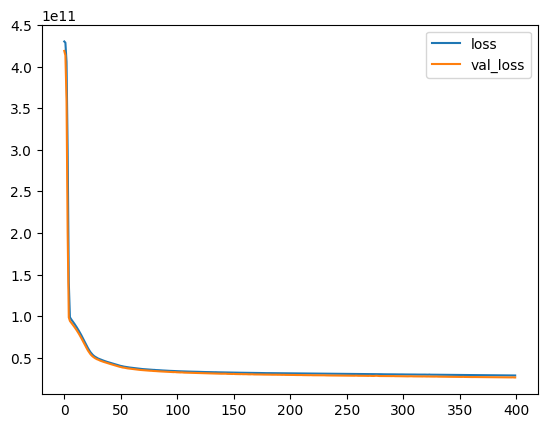

In [ ]:
losses.plot.line()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mean_absolute_error(y_test, predictions)

99973.41219135803

In [ ]:
mean_squared_error(y_test, predictions)

26262216973.98344

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

np.float64(162056.21547470323)

In [ ]:
explained_variance_score(y_test, predictions)

0.8019980975500189

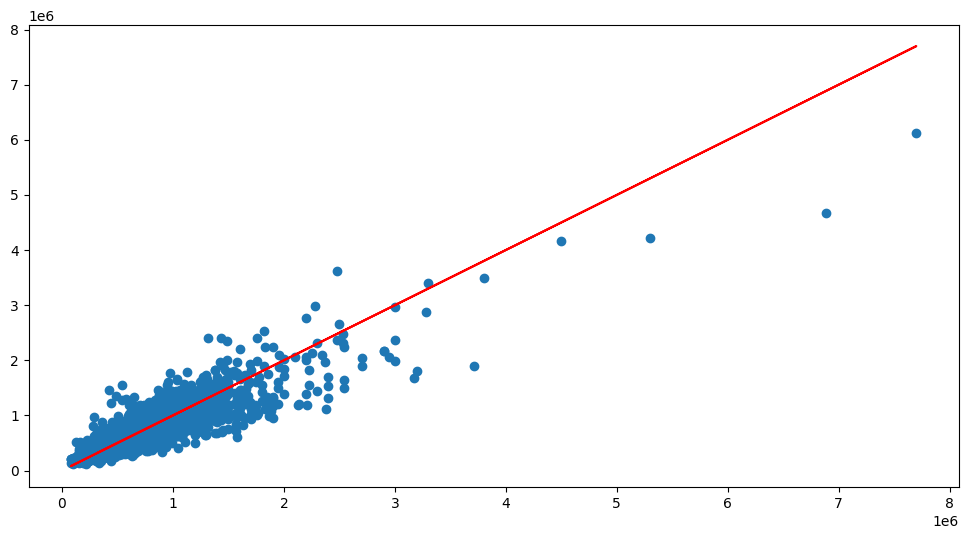

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

In [ ]:
single_house = df.drop(columns = 'price', axis = 1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[272998.97]], dtype=float32)